In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Folder dataset
train_dir = 'EmotionData/train'  # Path ke folder train
test_dir = 'EmotionData/test'    # Path ke folder test

# Preprocessing Data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

# Bangun Model CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 kelas emosi
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

# Simpan Model
model.save('emotion_model.keras')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 56s 61ms/step - accuracy: 0.2722 - loss: 1.7811 - val_accuracy: 0.4133 - val_loss: 1.5145
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4154 - loss: 1.5094 - val_accuracy: 0.4857 - val_loss: 1.3521
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4659 - loss: 1.3857 - val_accuracy: 0.4955 - val_loss: 1.3144
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4962 - loss: 1.3168 - val_accuracy: 0.5265 - val_loss: 1.2390
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.5122 - loss: 1.2779 - val_accuracy: 0.5389 - val_loss: 1.2155
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.5247 - loss: 1.2360 - val_accuracy: 0.5428 - val_loss: 1.2056
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 0.5325 - loss: 1.2166 - val_accuracy: 0.5587 - val_loss: 1.1791
Epoch

In [70]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
model = load_model('emotion_model.keras')

# Label emosi
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def detect_emotion(frame):
    # Resize frame ke 48x48 dan ubah menjadi array numpy
    resized_frame = cv2.resize(frame, (48, 48))
    normalized_frame = resized_frame / 255.0
    reshaped_frame = np.expand_dims(normalized_frame, axis=0)

    # Prediksi emosi
    predictions = model.predict(reshaped_frame)
    emotion_index = np.argmax(predictions)
    confidence = predictions[0][emotion_index] * 100

    return emotion_labels[emotion_index], confidence

In [71]:
import pandas as pd

# Muat dataset film
movies = pd.read_csv('processed_movies.csv')

def recommend_movies(emotion):
    emotion_genre_map = {
        'Sad': ['Comedy', 'Family', 'Drama'],
        'Happy': ['Romance', 'Adventure', 'Comedy'],
        'Angry': ['Action', 'Thriller', 'Crime'],
        'Surprise': ['Horror', 'Mystery', 'Thriller'],
        'Neutral': ['Popular', 'Action', 'Comedy']
    }
    
    genres = emotion_genre_map.get(emotion, ['Comedy', 'Drama'])
    recommendations = movies[movies['genres'].apply(lambda x: any(genre in x for genre in genres))]
    
    return recommendations[['title', 'genres']].head(10)

In [76]:
# Inisialisasi kamera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

# Ambil frame dari kamera
ret, frame = cap.read()
if not ret:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

# Deteksi ekspresi
emotion, confidence = detect_emotion(frame)
print(f"Ekspresi: {emotion}, Akurasi: {confidence:.2f}%")

# Rekomendasi film
recommendations = recommend_movies(emotion)
print("Rekomendasi Film:")
print(recommendations)

cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Ekspresi: Surprise, Akurasi: 80.87%
Rekomendasi Film:
                    title                                        genres
3   The Dark Knight Rises                   Action Crime Drama Thriller
11      Quantum of Solace               Adventure Action Thriller Crime
25                Titanic                        Drama Romance Thriller
27             Battleship     Thriller Action Adventure Science Fiction
28         Jurassic World     Action Adventure Science Fiction Thriller
29                Skyfall                     Action Adventure Thriller
33  X-Men: The Last Stand     Adventure Action Science Fiction Thriller
41          Green Lantern     Adventure Action Thriller Science Fiction
43   Terminator Salvation               Action Science Fiction Thriller
45            World War Z  Action Drama Horror Science Fiction Thriller


In [94]:
#MODELING DENGAN CNN
model = Sequential()

# Convolutional Layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Output sesuai jumlah kelas

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=200
)


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 498s 548ms/step - accuracy: 0.2252 - loss: 2.2755 - val_accuracy: 0.3732 - val_loss: 1.6401
Epoch 2/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.3111 - loss: 1.7377 - val_accuracy: 0.3816 - val_loss: 1.5681
Epoch 3/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.3610 - loss: 1.6365 - val_accuracy: 0.4264 - val_loss: 1.4834
Epoch 4/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.3850 - loss: 1.5693 - val_accuracy: 0.4575 - val_loss: 1.4509
Epoch 5/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 71s 78ms/step - accuracy: 0.4066 - loss: 1.5294 - val_accuracy: 0.4285 - val_loss: 1.4840
Epoch 6/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 71s 78ms/step - accuracy: 0.4243 - loss: 1.4854 - val_accuracy: 0.4794 - val_loss: 1.3619
Epoch 7/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 70s 78ms/step - accuracy: 0.4440 - loss: 1.4455 - val_accuracy: 0.4863 - val_loss: 1.3443
Epoch 8/200
898/898 ━━━━━━━━━━━━━━━━━━━━ 71s 79ms/step - accuracy: 0.4599 - loss:

In [95]:
model.save('emotions_model.keras')

In [96]:
# Evaluasi pada data test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrix dan Classification Report
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6392 - loss: 1.8505
Test Accuracy: 64.67%
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.14      0.14       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.15      0.11      0.13      1024
       happy       0.25      0.26      0.26      1774
     neutral       0.18      0.20      0.19      1233
         sad       0.19      0.21      0.20      1247
   surprised       0.12      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178

Confusion Matrix:
[[134  10  89 252 178 174 121]
 [ 15   0  14  31  22  21   8]
 [148   6 117 251 199 195 108]
 [252  20 196 459 335 322 190]
 [164  15 155 292 241 232 134]
 [174   7 133 314 228 259 132]
 [127  17  78 206 155 157  91]]


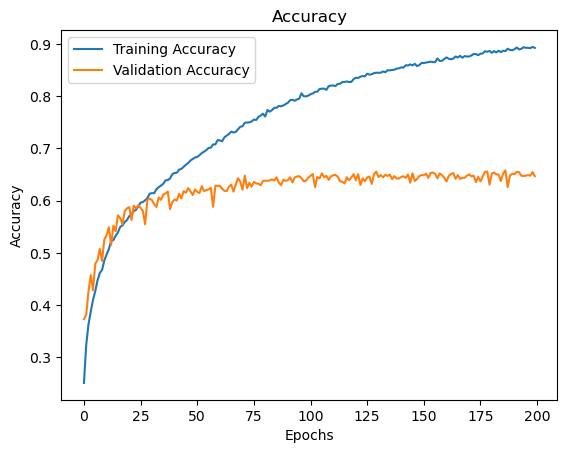

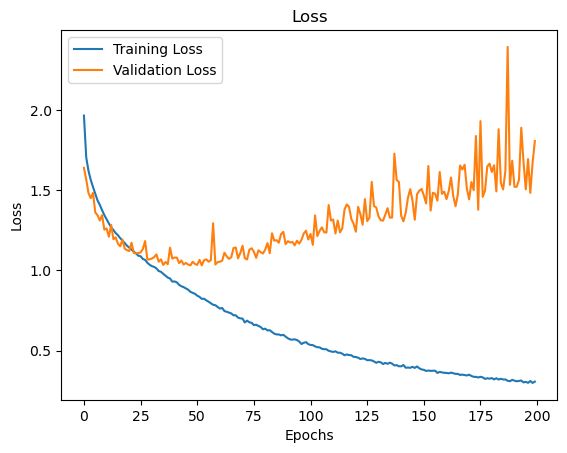

In [97]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [114]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Muat dataset film (dengan dataset yang sudah dibersihkan)
movies = pd.read_csv('processed_movies.csv')  # Path dataset
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Pastikan genres berupa daftar

# Muat model CNN terlatih
model = load_model('emotions_model.keras')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Adventure']  # Genre yang menghibur untuk sedih
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy','Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Mystery', 'Fantasy', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']  # Default jika emosi tidak terdeteksi

# Fungsi untuk merekomendasikan film berdasarkan ekspresi wajah
def predict_emotion_and_recommend(frame):
    # Konversi gambar ke grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize ke ukuran input model
    face_resized = cv2.resize(gray_frame, (48, 48))
    face_resized = face_resized.astype('float32') / 255.0  # Normalisasi

    # Konversi ke RGB (3 channel) untuk model
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB)
    face_rgb = face_rgb.reshape(1, 48, 48, 3)  # Tambahkan dimensi batch

    # Prediksi ekspresi wajah
    prediction = model.predict(face_rgb)
    emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    detected_emotion = emotion_classes[np.argmax(prediction)]  # Deteksi emosi dominan

    print(f"Ekspresi wajah terdeteksi: {detected_emotion}")

    # Rekomendasi genre berdasarkan emosi
    recommended_genres = get_recommendations_by_emotion(detected_emotion)
    print(f"Genre yang direkomendasikan: {recommended_genres}")

    # Filter dataset film berdasarkan genre yang direkomendasikan
    recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]

    # Tampilkan hasil rekomendasi
    print("Rekomendasi film berdasarkan ekspresi:")
    print(recommended_movies[['title', 'genres']])
    return recommended_movies[['title', 'genres']]

# Tangkap gambar dari kamera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

ret, frame = cap.read()
if not ret:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

cap.release()

# Proses prediksi emosi dan rekomendasi film
recommend_movies = predict_emotion_and_recommend(frame)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Ekspresi wajah terdeteksi: fear
Genre yang direkomendasikan: ['Popular', 'Action', 'Comedy']
Rekomendasi film berdasarkan ekspresi:
                       title    genres
44                 Furious 7  [Action]
155   Fun with Dick and Jane  [Comedy]
162                  Stealth  [Action]
251       Gulliver's Travels  [Comedy]
321             The Campaign  [Comedy]
...                      ...       ...
4698       Hollywood Shuffle  [Comedy]
4716                  The FP  [Comedy]
4734            A True Story  [Comedy]
4746                  Clerks  [Comedy]
4752                 Slacker  [Comedy]

[303 rows x 2 columns]


In [ ]:
## ALTERNATIF CODE

In [68]:
import cv2
from deepface import DeepFace
import pandas as pd

# Muat dataset film (dengan dataset yang sudah dibersihkan)
movies = pd.read_csv('processed_movies.csv')  # path dataset 

# Pastikan kolom genres berisi string yang dapat diproses
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Jika genre dipisahkan koma, sesuaikan sesuai format dataset

# Muat model deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Drama']  # Genre yang cocok untuk emosi 'sedih'
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Horror', 'Mystery', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']  # Default jika tidak ada emosi terdeteksi

# Fungsi untuk mendapatkan rekomendasi film berdasarkan ekspresi wajah
def recommend_movies_based_on_expression(frame):
    # Konversi frame ke grayscale untuk deteksi wajah
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Deteksi wajah dalam gambar
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    # Jika ada wajah yang terdeteksi
    for (x, y, w, h) in faces:
        face_roi = frame[y:y + h, x:x + w]
        
        try:
            # Prediksi ekspresi wajah menggunakan DeepFace
            results = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)
            dominant_emotion = results[0]['dominant_emotion']  # Ambil emosi dominan
            confidence = results[0]['emotion'][dominant_emotion]  # Ambil confidence untuk emosi dominan
            
            # Tampilkan hasil analisis dengan akurasi
            print(f"Ekspresi wajah: {dominant_emotion} (Confidence: {confidence:.2f})")
            
            # Dapatkan daftar genre berdasarkan emosi
            recommended_genres = get_recommendations_by_emotion(dominant_emotion.lower())
            print(f"Genre yang disarankan berdasarkan ekspresi: {recommended_genres}")
            
            # Filter film berdasarkan genre yang relevan
            recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]
            
            # Tampilkan hasil rekomendasi film
            print(f"Rekomendasi film:\n{recommended_movies[['title', 'genres']]}")
        
        except Exception as e:
            print(f"Kesalahan analisis wajah: {e}")

# Inisialisasi kamera dan ambil satu frame
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

# Ambil satu frame dari kamera
ret, frame = cap.read()
if not ret:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

# Melepaskan kamera setelah mengambil satu frame
cap.release()

# Lakukan rekomendasi film berdasarkan ekspresi wajah
recommend_movies_based_on_expression(frame)


Ekspresi wajah: surprise (Confidence: 99.38)
Genre yang disarankan berdasarkan ekspresi: ['Horror', 'Mystery', 'Thriller']
Rekomendasi film:
                                  title      genres
603                           Hard Rain  [Thriller]
936                    Don't Say a Word  [Thriller]
943                            Firewall  [Thriller]
1011                    The Tooth Fairy    [Horror]
1160                    The Conjuring 2    [Horror]
...                                 ...         ...
4659                     American Beast    [Horror]
4705                      Straightheads  [Thriller]
4738                     Raymond Did It    [Horror]
4744  Her Cry: La Llorona Investigation    [Horror]
4764                        Tin Can Man    [Horror]

[87 rows x 2 columns]


In [2]:
# libraries for system
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image


# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



#import DL libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [3]:
train_dir = 'EmotionData/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [4]:
train_df

,filepaths,labels
0,EmotionData/train\angry\im0.png,angry
1,EmotionData/train\angry\im1.png,angry
2,EmotionData/train\angry\im10.png,angry
3,EmotionData/train\angry\im100.png,angry
4,EmotionData/train\angry\im1000.png,angry
...,...,...
28704,EmotionData/train\surprised\im995.png,surprised
28705,EmotionData/train\surprised\im996.png,surprised
28706,EmotionData/train\surprised\im997.png,surprised
28707,EmotionData/train\surprised\im998.png,surprised


In [5]:
# Generate  test data paths with labels
test_dir = 'EmotionData/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [6]:
test_df

,filepaths,labels
0,EmotionData/test\angry\im0.png,angry
1,EmotionData/test\angry\im1.png,angry
2,EmotionData/test\angry\im10.png,angry
3,EmotionData/test\angry\im100.png,angry
4,EmotionData/test\angry\im101.png,angry
...,...,...
7173,EmotionData/test\surprised\im95.png,surprised
7174,EmotionData/test\surprised\im96.png,surprised
7175,EmotionData/test\surprised\im97.png,surprised
7176,EmotionData/test\surprised\im98.png,surprised


In [7]:
# valid and test dataframe
valid_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 123)

In [8]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 28709 validated image filenames belonging to 7 classes.
Found 4306 validated image filenames belonging to 7 classes.
Found 2872 validated image filenames belonging to 7 classes.


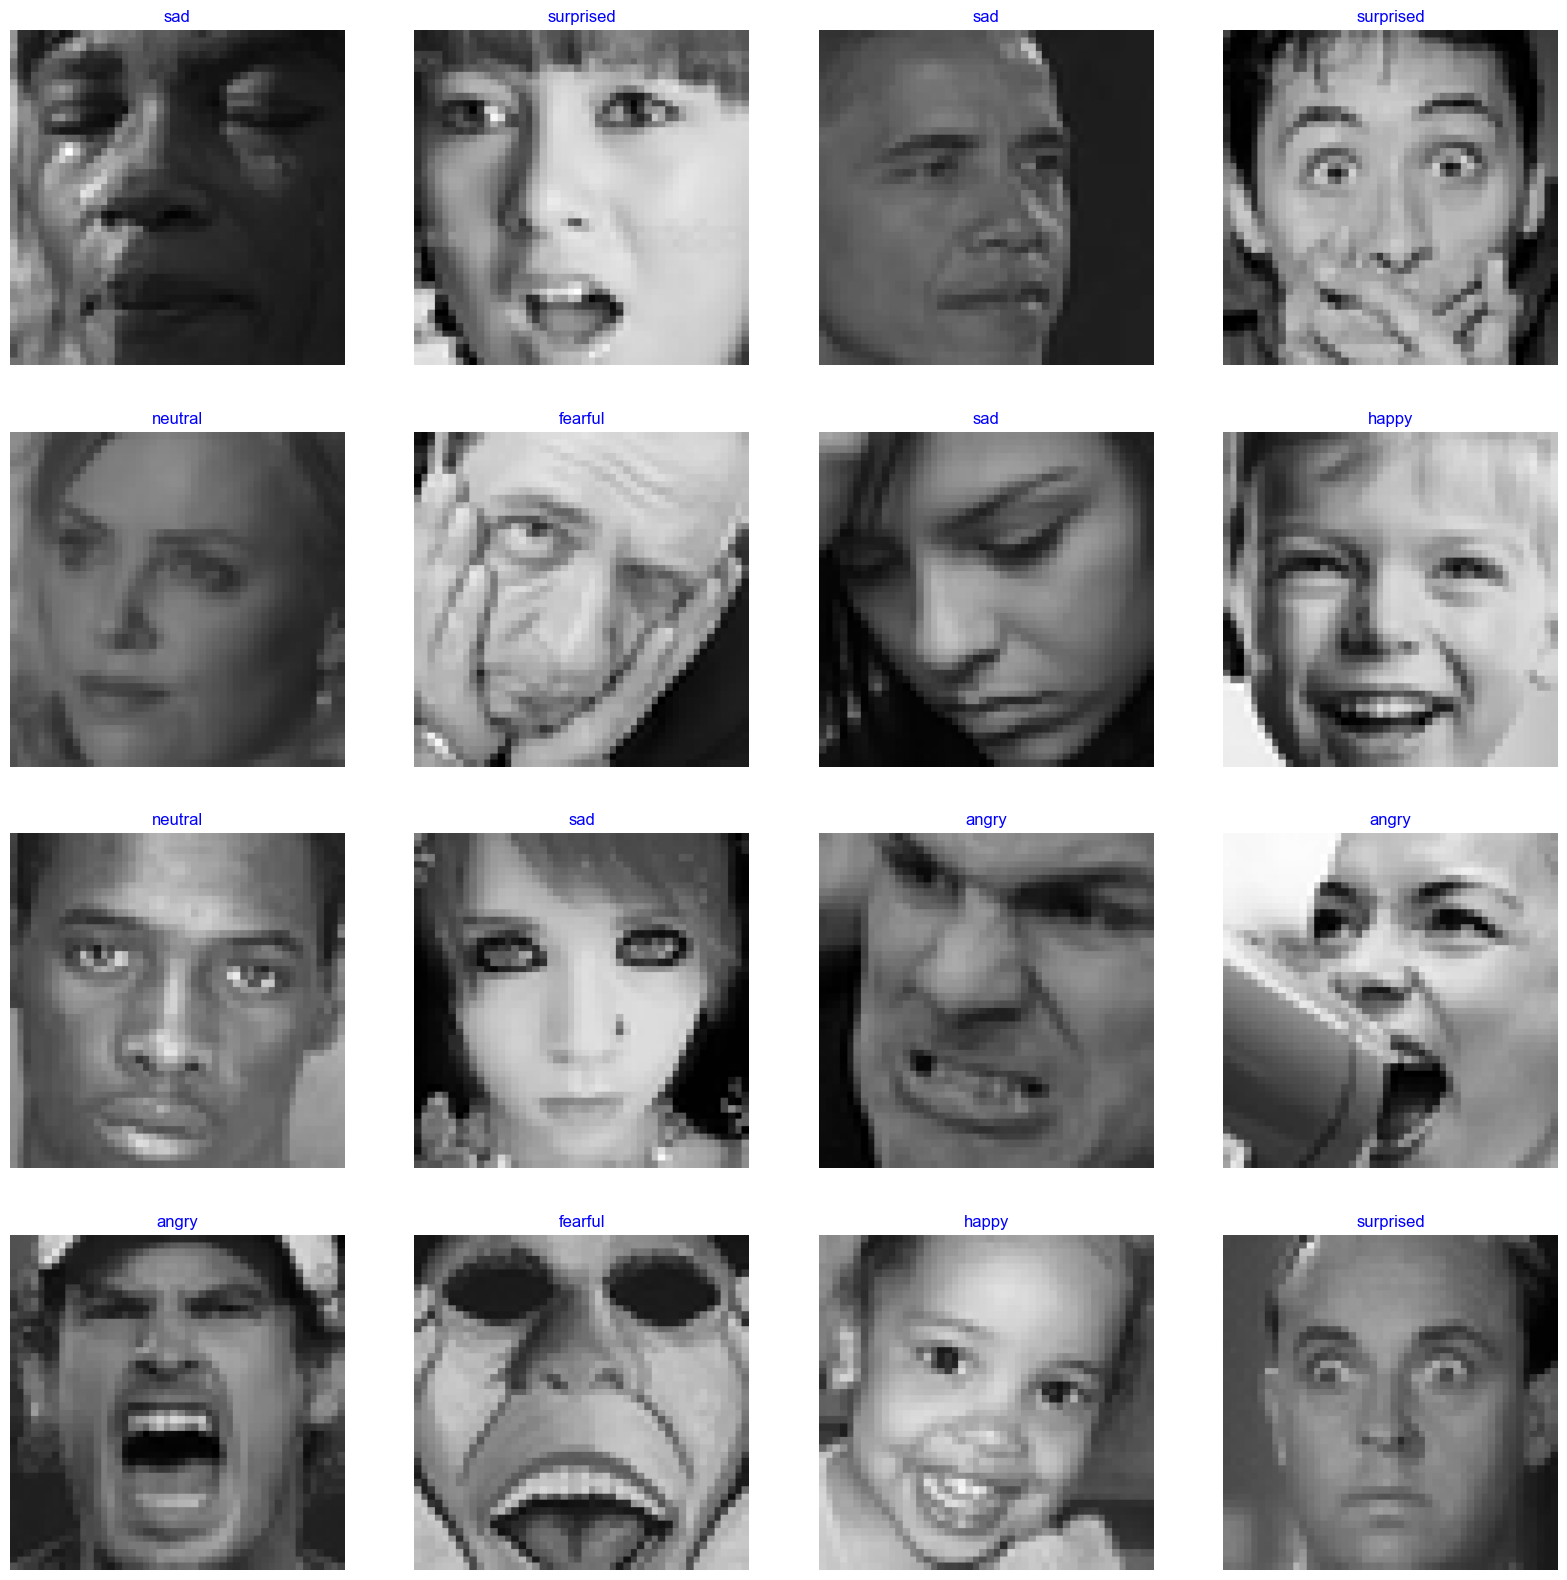

In [9]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

# Input shape dan jumlah kelas
img_shape = (224, 224, 3)  # Ganti sesuai data Anda
class_count = 7          # Jumlah kelas emosi

# Base model menggunakan EfficientNet
base_model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=False, 
    weights="imagenet", 
    input_shape=img_shape, 
    pooling='max'
)

# Fine-tuning model
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, 
          kernel_regularizer=regularizers.l2(0.016),  # Perbaikan di sini
          activity_regularizer=regularizers.l1(0.006),  # Perbaikan di sini
          bias_regularizer=regularizers.l1(0.006),  # Perbaikan di sini
          activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Kompilasi model
model.compile(optimizer=Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Summary model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)          │ (None, 2560)                │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2560)                │          10,240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,765,342 (247.06 MB)

 Trainable params: 64,449,495 (245.86 MB)

 Non-trainable params: 315,847 (1.20 MB)

GPU Available: []
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,470,919 (9.43 MB)

 Trainable params: 2,470,919 (9.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.2488 - loss: 1.8230 - val_accuracy: 0.2567 - val_loss: 1.7934
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.2583 - loss: 1.7826 - val_accuracy: 0.2747 - val_loss: 1.7561
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 90ms/step - accuracy: 0.2801 - loss: 1.7532 - val_accuracy: 0.2846 - val_loss: 1.7341
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.2970 - loss: 1.7200 - val_accuracy: 0.3344 - val_loss: 1.6743
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3362 - loss: 1.6597 - val_accuracy: 0.3827 - val_loss: 1.5829
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.3643 - loss: 1.5898 - val_accuracy: 0.3917 - val_loss: 1.5461
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 86ms/step - accuracy: 0.3927 - loss: 1.5413 - val_accuracy: 0.4365 - val_loss: 1.4810
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.4202 - loss: 1.4982 - val_a

Test Accuracy: 60.56%
Model berhasil disimpan.


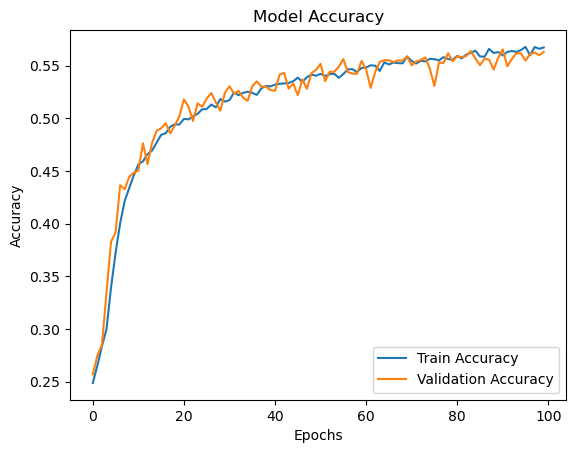

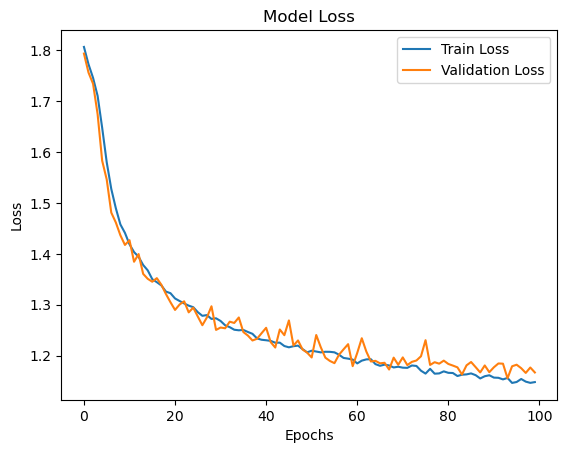

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Pastikan TensorFlow mendeteksi GPU (opsional, jika ada GPU)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Direktori dataset
train_dir = 'EmotionData/train'  # Ganti dengan path folder train
test_dir = 'EmotionData/test'    # Ganti dengan path folder test

# Parameter utama
img_size = (48, 48)
batch_size = 64
epochs = 100
learning_rate = 0.001

# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% data digunakan untuk validasi
)

# Data train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'  # Data untuk pelatihan
)

# Data validasi
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'  # Data untuk validasi
)

# Data test (tidak perlu augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False  # Jangan shuffle test set
)

# Membangun model CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output sesuai jumlah kelas
])

# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()

# Pelatihan model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    verbose=1
)

# Evaluasi pada data test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Menyimpan model
model.save('emotion_detection_model.h5')
print("Model berhasil disimpan.")

# Visualisasi hasil pelatihan (opsional)
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Muat dataset film
movies = pd.read_csv('processed_movies.csv')  # Path ke dataset film
movies['genres'] = movies['genres'].apply(lambda x: x.split(','))  # Konversi string list ke list Python

# Muat model CNN
model = load_model('emotion_detection_model.h5')

# Fungsi untuk menentukan genre berdasarkan emosi
def get_recommendations_by_emotion(emotion):
    if emotion == 'sad':
        return ['Comedy', 'Family', 'Adventure']
    elif emotion == 'happy':
        return ['Romance', 'Adventure', 'Drama']
    elif emotion == 'angry':
        return ['Comedy', 'Action', 'Thriller', 'Crime']
    elif emotion == 'surprise':
        return ['Mystery', 'Fantasy', 'Thriller']
    else:
        return ['Popular', 'Action', 'Comedy']

# Fungsi untuk merekomendasikan film berdasarkan ekspresi wajah
def predict_emotion_and_recommend(frame):
    if frame is None or frame.size == 0:
        print("Frame kosong, tidak dapat diproses.")
        return None

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_resized = cv2.resize(gray_frame, (48, 48)).astype('float32') / 255.0
    face_input = np.expand_dims(np.expand_dims(face_resized, -1), 0)
    prediction = model.predict(face_input)
    emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    detected_emotion = emotion_classes[np.argmax(prediction)]

    print(f"Ekspresi wajah terdeteksi: {detected_emotion}")
    recommended_genres = get_recommendations_by_emotion(detected_emotion)
    recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]

    print("\nRekomendasi film berdasarkan ekspresi:")
    print(recommended_movies[['title', 'genres']])
    return recommended_movies[['title', 'genres']]

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Tidak dapat membuka kamera.")
    exit()

ret, frame = cap.read()
if not ret or frame is None:
    print("Tidak dapat membaca frame.")
    cap.release()
    exit()

cap.release()
recommended_movies = predict_emotion_and_recommend(frame)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Ekspresi wajah terdeteksi: surprise

Rekomendasi film berdasarkan ekspresi:
                                title      genres
105   Alice Through the Looking Glass   [Fantasy]
161                     Gods of Egypt   [Fantasy]
584                              Wolf   [Fantasy]
603                         Hard Rain  [Thriller]
803                       DragonHeart   [Fantasy]
936                  Don't Say a Word  [Thriller]
943                          Firewall  [Thriller]
1346                   Reindeer Games  [Thriller]
1634           Assault on Precinct 13  [Thriller]
1770                    Money Monster  [Thriller]
2035              Our Kind of Traitor  [Thriller]
2274                         Survivor  [Thriller]
2366                     Dragonslayer   [Fantasy]
2391                       Red Lights  [Thriller]
2401                   City of Ghosts  [Thriller]
2588                A Most Wanted Man  [Thriller]
2622                     The In Crow

In [1]:
import tensorflow as tf

# Muat model Keras yang telah dilatih
model = tf.keras.models.load_model("emotion_detection_model.h5")

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open("emotion_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite dan disimpan sebagai 'emotion_model.tflite'.")

INFO:tensorflow:Assets written to: C:\Users\PIXIED~1\AppData\Local\Temp\tmpyr8r9yy1\assets


INFO:tensorflow:Assets written to: C:\Users\PIXIED~1\AppData\Local\Temp\tmpyr8r9yy1\assets


Saved artifact at 'C:\Users\PIXIED~1\AppData\Local\Temp\tmpyr8r9yy1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1987305515600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305515792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305516944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305517520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305519632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305520208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305520400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305520784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987305520592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1987331262224: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model

In [6]:
import numpy as np
import tensorflow as tf

# Muat model TFLite
interpreter = tf.lite.Interpreter(model_path="emotion_model.tflite")
interpreter.allocate_tensors()

# Ambil detail input/output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Uji model dengan data input contoh
test_input = np.random.rand(48, 48).astype(np.float32)  # Contoh input (48x48 grayscale)
test_input = test_input.reshape(1, 48, 48, 1)  # Tambahkan dimensi batch dan channel

# Pastikan input sesuai dengan model
interpreter.set_tensor(input_details[0]['index'], test_input)

# Jalankan model
interpreter.invoke()

# Ambil output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Hasil prediksi:", output_data)

Hasil prediksi: [[0.60456485 0.00236916 0.25259775 0.00836716 0.0077611  0.12290919
  0.00143083]]
